In [113]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sys

## Load Data

In [114]:
df = pd.read_csv("data/METABRIC_RNA_Mutation.csv", low_memory = False)
df.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [115]:
clinic_data = df.loc[:, df.columns[:31]]
clinic_data.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,6.044,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2.0,Living
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,4.020,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0,Living
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,4.030,IDC,163.700000,0,Positive,0,NaN,15.0,2.0,Died of Disease
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,4.050,MDLC,164.933333,1,Positive,1,NaN,25.0,2.0,Living
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,6.080,MDLC,41.366667,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [116]:
genomic_data = df.loc[:, df.columns[31:]]
genomic_data.head()

,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,-1.3990,-0.5738,-1.6217,1.4524,0.3504,1.1517,0.0348,0.1266,-0.8361,-0.8578,...,0,0,0,0,0,0,0,0,0,0
1,-1.3800,0.2777,-1.2154,0.5296,-0.0136,-0.2659,1.3594,0.7961,0.5419,-2.6059,...,0,0,0,0,0,0,0,0,0,0
2,0.0670,-0.8426,0.2114,-0.3326,0.5141,-0.0803,1.1398,0.4187,-0.4030,-1.1305,...,0,0,0,0,0,0,0,0,0,0
3,0.6744,-0.5428,-1.6592,0.6369,1.6708,-0.8880,1.2491,-1.1889,-0.4174,-0.6165,...,0,0,0,0,0,0,0,0,0,0
4,1.2932,-0.9039,-0.7219,0.2168,0.3484,0.3897,0.9131,0.9356,0.7675,-0.2940,...,0,0,0,0,0,0,0,0,0,0


## Detecting Missing Values

In [117]:
#Finding missing data and the percentage of it in each column
total = genomic_data.isnull().sum().sort_values(ascending = False)
percent = (genomic_data.isnull().sum() / genomic_data.isnull().count()).sort_values(ascending=False)
missing_genomic = pd.concat([total, percent], axis = 1, keys = ['total_null', 'percent_null'])
missing_genomic.head()

,total_null,percent_null
siah1_mut,0,0.0
nfkb1,0,0.0
mmp9,0,0.0
mmp7,0,0.0
mmp3,0,0.0


In [118]:
#Finding missing data and the percentage of it in each column
total = clinic_data.isnull().sum().sort_values(ascending = False)
percent = (clinic_data.isnull().sum() / clinic_data.isnull().count()).sort_values(ascending=False)
missing_clinic = pd.concat([total, percent], axis = 1, keys = ['total_null', 'percent_null'])
missing_clinic.head(14)

,total_null,percent_null
tumor_stage,501,0.263130
3-gene_classifier_subtype,204,0.107143
primary_tumor_laterality,106,0.055672
neoplasm_histologic_grade,72,0.037815
cellularity,54,0.028361
mutation_count,45,0.023634
er_status_measured_by_ihc,30,0.015756
type_of_breast_surgery,22,0.011555
tumor_size,20,0.010504
tumor_other_histologic_subtype,15,0.007878


In [119]:
total = 0
for i in missing_clinic['total_null']:
    total += i
print(total)

1100


In [120]:
clinic_data.shape

(1904, 31)

## Filling the Missing Values

Since we have 1100 missing values, we should fill in instead of drop out.

### Visualize the Columns w/ Missing Values

tumor_stage


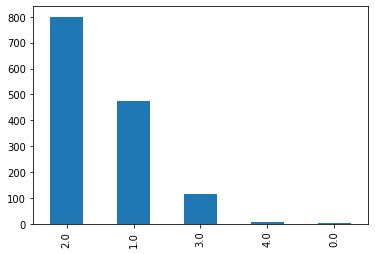

3-gene_classifier_subtype


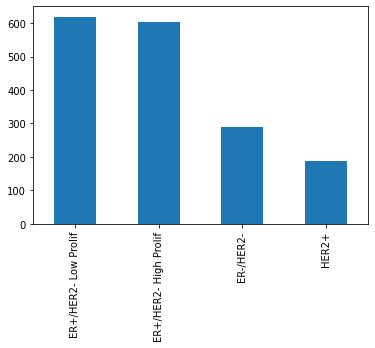

primary_tumor_laterality


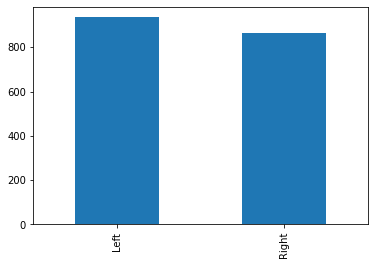

neoplasm_histologic_grade


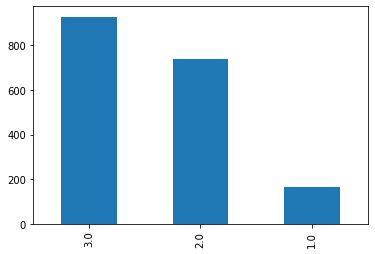

cellularity


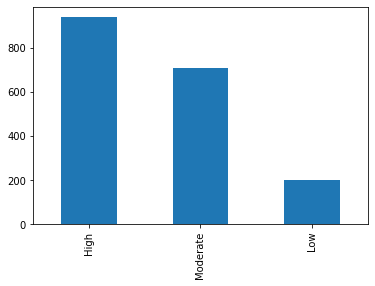

mutation_count


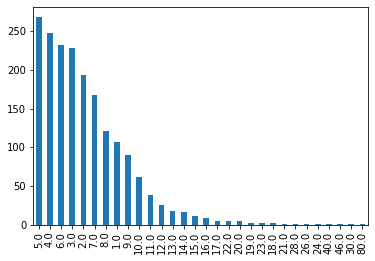

er_status_measured_by_ihc


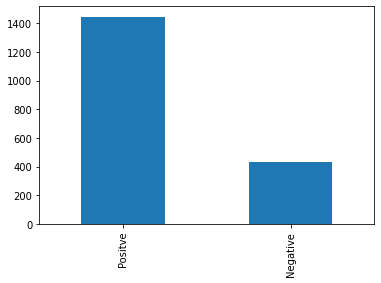

type_of_breast_surgery


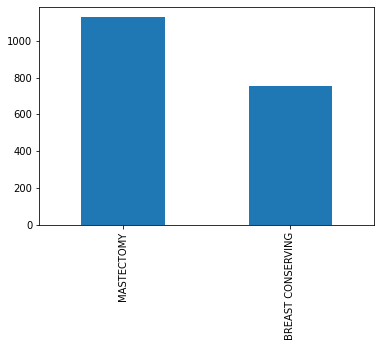

tumor_size


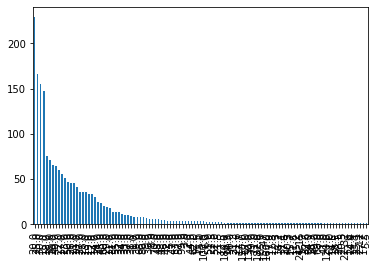

tumor_other_histologic_subtype


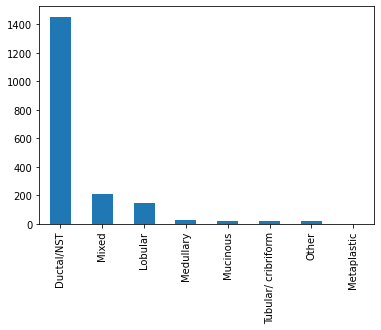

cancer_type_detailed


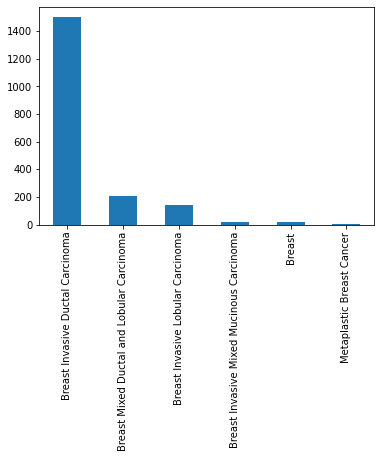

oncotree_code


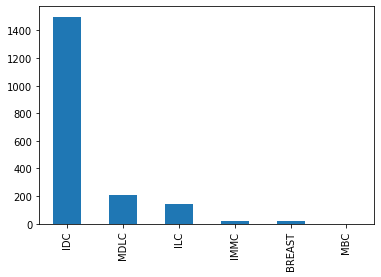

death_from_cancer


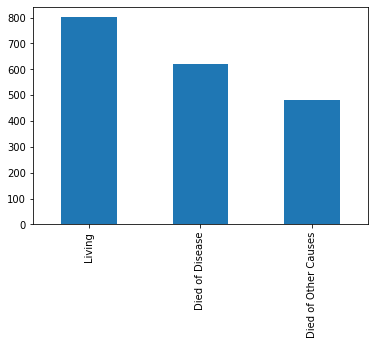

In [121]:
for missing_column in missing_clinic.index[:13]:
    df[missing_column].value_counts().plot.bar()
    print(missing_column)
    plt.show()

In [122]:
for column in missing_clinic.index[:13]:
    df[column].fillna(df[column].mode()[0], inplace=True)

#df = df.dropna()

In [123]:
df.isnull().sum().value_counts()

0    693
dtype: int64

In [124]:
df.shape

(1904, 693)

## Drop Columns & Value Counts & Interpreting Data

In [125]:
df.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [126]:
for i in df.columns:
    unique_values = np.unique(df[i])
    print(i)
    print(unique_values)

patient_id
[   0    2    5 ... 7297 7298 7299]
age_at_diagnosis
[21.93 26.36 26.72 ... 90.43 92.14 96.29]
type_of_breast_surgery
['BREAST CONSERVING' 'MASTECTOMY']
cancer_type
['Breast Cancer' 'Breast Sarcoma']
cancer_type_detailed
['Breast' 'Breast Invasive Ductal Carcinoma'
 'Breast Invasive Lobular Carcinoma'
 'Breast Invasive Mixed Mucinous Carcinoma'
 'Breast Mixed Ductal and Lobular Carcinoma' 'Metaplastic Breast Cancer']
cellularity
['High' 'Low' 'Moderate']
chemotherapy
[0 1]
pam50_+_claudin-low_subtype
['Basal' 'Her2' 'LumA' 'LumB' 'NC' 'Normal' 'claudin-low']
cohort
[1. 2. 3. 4. 5.]
er_status_measured_by_ihc
['Negative' 'Positve']
er_status
['Negative' 'Positive']
neoplasm_histologic_grade
[1. 2. 3.]
her2_status_measured_by_snp6
['GAIN' 'LOSS' 'NEUTRAL' 'UNDEF']
her2_status
['Negative' 'Positive']
tumor_other_histologic_subtype
['Ductal/NST' 'Lobular' 'Medullary' 'Metaplastic' 'Mixed' 'Mucinous'
 'Other' 'Tubular/ cribriform']
hormone_therapy
[0 1]
inferred_menopausal_state
[

hes1
[-3.7008 -3.4673 -3.0636 ...  3.0975  3.1827  4.5158]
hes5
[-2.3126 -2.2856 -2.1935 ...  4.97   12.5922 17.1431]
heyl
[-2.9563 -2.9232 -2.8065 ...  3.4244  4.4446  5.1303]
itch
[-3.2882 -3.023  -2.9652 ...  4.5175  5.1252  6.7771]
jag1
[-3.0058 -2.6388 -2.5331 ...  4.4352  4.5818  7.0501]
jag2
[-3.6459 -3.1405 -2.8915 ...  3.397   3.4888  3.7708]
kdm5a
[-4.3789 -3.4416 -3.2661 ...  4.8134  5.0267  5.7061]
lfng
[-2.9711 -2.968  -2.7482 ...  2.9399  3.0455  3.1072]
maml1
[-3.812  -3.5079 -3.4115 ...  3.9159  4.2531  4.4105]
maml2
[-2.4091 -2.285  -2.2218 ...  5.4675  5.7232  7.6897]
maml3
[-2.4445 -2.4029 -2.3518 ...  6.3554  6.3621  7.2613]
ncor2
[-4.4539 -3.3066 -3.2675 ...  3.0274  3.0673  3.7667]
ncstn
[-4.9158 -4.3913 -4.364  ...  3.064   3.1741  3.41  ]
notch1
[-3.3228 -2.9739 -2.7904 ...  4.6114  4.9699  5.0313]
notch2
[-3.7797 -3.5877 -3.5135 ...  4.7662  6.5231  7.2538]
notch3
[-3.967  -3.7898 -3.667  ...  3.5837  4.6378  5.2096]
nrarp
[-3.4967 -3.3745 -3.3006 ...  5.5201  

cyp2c8
[-1.9889 -1.7621 -1.7057 ...  7.4264  9.5645 11.8916]
cyp3a4
[-3.1144 -2.7366 -2.6649 ...  3.3624  3.7639  4.3695]
fgf2
[-2.1487 -1.6623 -1.622  ...  6.1323  6.2206  8.2865]
fn1
[-1.977  -1.945  -1.9231 ...  4.5679  4.7547  5.8805]
map2
[-1.8012 -1.6144 -1.6077 ...  5.487   6.4305  6.9005]
map4
[-2.4981 -2.1819 -1.8889 ...  5.4792  5.5399  6.326 ]
mapt
[-2.0151 -1.9292 -1.9289 ...  1.9887  2.0919  2.3416]
nr1i2
[-3.6693 -3.0958 -2.9106 ...  3.9428  4.5592  4.7584]
slco1b3
[-3.2487 -3.0214 -2.9102 ...  7.0602  8.2892 14.8651]
tubb1
[-2.7443 -2.5958 -2.505  ...  5.891   6.1393  8.4721]
tubb4a
[-1.5539 -1.3447 -1.3345 ...  7.8392  8.6391 18.6351]
tubb4b
[-3.6677 -2.9398 -2.8698 ...  3.418   3.7305  5.2716]
twist1
[-2.1429 -1.9601 -1.9457 ...  6.4459  6.6312  7.9391]
adgra2
[-2.5635 -2.5425 -2.3603 ...  4.2778  4.8036  5.3695]
afdn
[-3.6358 -3.568  -3.1594 ...  3.587   3.7204  5.5151]
aff2
[-2.6108 -2.4547 -2.3772 ...  7.0403 11.3338 12.1414]
agmo
[-3.3888 -3.3053 -3.2618 ...  4.744

men1_mut
['0' 'D177Y M283I' 'D423H' 'D70Tfs*49' 'E196K' 'E364del' 'E371Kfs*2'
 'E397*' 'E397K' 'G230R' 'I353M' 'N194Mfs*35' 'P545S R394P' 'P79S'
 'R108G L48V' 'R223W' 'R612C' 'S122*' 'S38F' 'S492A' 'V101I']
stk11_mut
['0' 'A205P' 'A316G' 'A420S' 'D53Gfs*110' 'G187C' 'H306Y' 'H345R'
 'K312Nfs*14' 'K62M' 'M125Nfs*40' 'N119D' 'N380S' 'R147C' 'R86*' 'S216F'
 'S307G' 'S59Lfs*103' 'T328Ifs*32' 'V143M' 'V243Sfs*44' 'X6_splice']
sik2_mut
['0' 'A633V' 'A732T' 'A854T' 'I79V' 'L675R' 'N395K' 'P185L' 'P223S'
 'P832del' 'Q319H' 'Q603R' 'Q668K' 'Q800*' 'Q866*' 'R113W' 'R437Q' 'S554G'
 'S762delinsFSAGPTVQP' 'S845del']
ptpn22_mut
['0' 'A606S' 'D197V' 'E72K' 'F706del' 'G524A' 'I19T' 'I348Sfs*14' 'I404V'
 'P768S' 'R70W' 'R748G' 'S520C' 'S782L' 'T109N' 'X66_splice' 'X712_splice'
 'X761_splice' 'Y471N']
brip1_mut
['0' 'C219R' 'D546G' 'E412Q' 'F934S' 'H213R' 'H804R' 'H835Q' 'I610V'
 'I780L' 'K242N G859E R261K K234N M273I' 'L573V' 'M1?' 'N851Y S682C'
 'P785L' 'Q227E' 'T232I' 'T997Rfs*61' 'V894I' 'W1217*' 'X

In [127]:
# death_from_cancer, gene_classifier_subtype, pr_status, oncotree_code, integrative_cluster, inferred_menopausal_state,
# tumor_other_histologic_subtype, her2_status, her2_status_measured_by_snp6, er_status, er_status_measured_by_ihc,
# pam50_+_claudin-low_subtype, cellularity, type_of_breast_surgery, cancer_type_detailed

# Ordinal (Label)
# cellularity, cancer_type_detailed, type_of_breast_surgery, her2_status_measured_by_snp6, pam50_+_claudin-low_subtype,
# her2_status_measured_by_snp6, tumor_other_histologic_subtype, integrative_cluster, 3-gene_classifier_subtype,
# death_from_cancer

# Nominal (One Hot)
# er_status_measured_by_ihc, er_status, her2_status, inferred_menopausal_state, primary_tumor_laterality, pr_status,
# oncotree_code

## Label Encoding (Ordinal)

In [128]:
ordinal_df = df[['cellularity','cancer_type_detailed','type_of_breast_surgery',
                       'her2_status_measured_by_snp6','pam50_+_claudin-low_subtype',
                       'her2_status_measured_by_snp6','tumor_other_histologic_subtype',
                       'integrative_cluster','3-gene_classifier_subtype','death_from_cancer']]
ordinal_df.head()

,cellularity,cancer_type_detailed,type_of_breast_surgery,her2_status_measured_by_snp6,pam50_+_claudin-low_subtype,her2_status_measured_by_snp6,tumor_other_histologic_subtype,integrative_cluster,3-gene_classifier_subtype,death_from_cancer
0,High,Breast Invasive Ductal Carcinoma,MASTECTOMY,NEUTRAL,claudin-low,NEUTRAL,Ductal/NST,4ER+,ER-/HER2-,Living
1,High,Breast Invasive Ductal Carcinoma,BREAST CONSERVING,NEUTRAL,LumA,NEUTRAL,Ductal/NST,4ER+,ER+/HER2- High Prolif,Living
2,High,Breast Invasive Ductal Carcinoma,MASTECTOMY,NEUTRAL,LumB,NEUTRAL,Ductal/NST,3,ER+/HER2- Low Prolif,Died of Disease
3,Moderate,Breast Mixed Ductal and Lobular Carcinoma,MASTECTOMY,NEUTRAL,LumB,NEUTRAL,Mixed,9,ER+/HER2- Low Prolif,Living
4,High,Breast Mixed Ductal and Lobular Carcinoma,MASTECTOMY,NEUTRAL,LumB,NEUTRAL,Mixed,9,ER+/HER2- High Prolif,Died of Disease


In [129]:
from sklearn.preprocessing import LabelEncoder
# creating initial dataframe
ordinal_df = ordinal_df.apply(LabelEncoder().fit_transform)
ordinal_df.head()

,cellularity,cancer_type_detailed,type_of_breast_surgery,her2_status_measured_by_snp6,pam50_+_claudin-low_subtype,her2_status_measured_by_snp6,tumor_other_histologic_subtype,integrative_cluster,3-gene_classifier_subtype,death_from_cancer
0,0,1,1,2,6,2,0,4,2,2
1,0,1,0,2,2,2,0,4,0,2
2,0,1,1,2,3,2,0,3,1,0
3,2,4,1,2,3,2,4,10,1,2
4,0,4,1,2,3,2,4,10,0,0


## One-Hot Encoding (Nominal)

In [130]:
nominal_df = df[['er_status_measured_by_ihc','er_status', 'her2_status', 'inferred_menopausal_state',
                'primary_tumor_laterality', 'pr_status', 'oncotree_code']]
nominal_df.head()

,er_status_measured_by_ihc,er_status,her2_status,inferred_menopausal_state,primary_tumor_laterality,pr_status,oncotree_code
0,Positve,Positive,Negative,Post,Right,Negative,IDC
1,Positve,Positive,Negative,Pre,Right,Positive,IDC
2,Positve,Positive,Negative,Pre,Right,Positive,IDC
3,Positve,Positive,Negative,Pre,Right,Positive,MDLC
4,Positve,Positive,Negative,Post,Right,Positive,MDLC


In [131]:
nominal_df = pd.get_dummies(data = nominal_df, drop_first= True)
nominal_df.head()

,er_status_measured_by_ihc_Positve,er_status_Positive,her2_status_Positive,inferred_menopausal_state_Pre,primary_tumor_laterality_Right,pr_status_Positive,oncotree_code_IDC,oncotree_code_ILC,oncotree_code_IMMC,oncotree_code_MBC,oncotree_code_MDLC
0,1,1,0,0,1,0,1,0,0,0,0
1,1,1,0,1,1,1,1,0,0,0,0
2,1,1,0,1,1,1,1,0,0,0,0
3,1,1,0,1,1,1,0,0,0,0,1
4,1,1,0,0,1,1,0,0,0,0,1


### Add ordinal_df

In [132]:
df.drop(ordinal_df.columns, axis = 1, inplace = True)
df = df.join(ordinal_df)
df.head()

,patient_id,age_at_diagnosis,cancer_type,chemotherapy,cohort,er_status_measured_by_ihc,er_status,neoplasm_histologic_grade,her2_status,hormone_therapy,...,cellularity,cancer_type_detailed,type_of_breast_surgery,her2_status_measured_by_snp6,pam50_+_claudin-low_subtype,her2_status_measured_by_snp6,tumor_other_histologic_subtype,integrative_cluster,3-gene_classifier_subtype,death_from_cancer
0,0,75.65,Breast Cancer,0,1.0,Positve,Positive,3.0,Negative,1,...,0,1,1,2,6,2,0,4,2,2
1,2,43.19,Breast Cancer,0,1.0,Positve,Positive,3.0,Negative,1,...,0,1,0,2,2,2,0,4,0,2
2,5,48.87,Breast Cancer,1,1.0,Positve,Positive,2.0,Negative,1,...,0,1,1,2,3,2,0,3,1,0
3,6,47.68,Breast Cancer,1,1.0,Positve,Positive,2.0,Negative,1,...,2,4,1,2,3,2,4,10,1,2
4,8,76.97,Breast Cancer,1,1.0,Positve,Positive,3.0,Negative,1,...,0,4,1,2,3,2,4,10,0,0


### Add nominal_df

In [133]:
df.drop(['er_status_measured_by_ihc','er_status', 'her2_status', 'inferred_menopausal_state',
                'primary_tumor_laterality', 'pr_status', 'oncotree_code'], axis = 1, inplace = True)
df = df.join(nominal_df)
df.head()

,patient_id,age_at_diagnosis,cancer_type,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,...,er_status_Positive,her2_status_Positive,inferred_menopausal_state_Pre,primary_tumor_laterality_Right,pr_status_Positive,oncotree_code_IDC,oncotree_code_ILC,oncotree_code_IMMC,oncotree_code_MBC,oncotree_code_MDLC
0,0,75.65,Breast Cancer,0,1.0,3.0,1,10.0,5.0,6.044,...,1,0,0,1,0,1,0,0,0,0
1,2,43.19,Breast Cancer,0,1.0,3.0,1,0.0,2.0,4.020,...,1,0,1,1,1,1,0,0,0,0
2,5,48.87,Breast Cancer,1,1.0,2.0,1,1.0,2.0,4.030,...,1,0,1,1,1,1,0,0,0,0
3,6,47.68,Breast Cancer,1,1.0,2.0,1,3.0,1.0,4.050,...,1,0,1,1,1,0,0,0,0,1
4,8,76.97,Breast Cancer,1,1.0,3.0,1,8.0,2.0,6.080,...,1,0,0,1,1,0,0,0,0,1


In [134]:
df.isnull().sum().sum()

0

### Rounding Age of Patients

In [135]:
df[['age_at_diagnosis','nottingham_prognostic_index']] = df[['age_at_diagnosis','nottingham_prognostic_index']].apply(np.ceil)

In [136]:
df.head()

,patient_id,age_at_diagnosis,cancer_type,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,...,er_status_Positive,her2_status_Positive,inferred_menopausal_state_Pre,primary_tumor_laterality_Right,pr_status_Positive,oncotree_code_IDC,oncotree_code_ILC,oncotree_code_IMMC,oncotree_code_MBC,oncotree_code_MDLC
0,0,76.0,Breast Cancer,0,1.0,3.0,1,10.0,5.0,7.0,...,1,0,0,1,0,1,0,0,0,0
1,2,44.0,Breast Cancer,0,1.0,3.0,1,0.0,2.0,5.0,...,1,0,1,1,1,1,0,0,0,0
2,5,49.0,Breast Cancer,1,1.0,2.0,1,1.0,2.0,5.0,...,1,0,1,1,1,1,0,0,0,0
3,6,48.0,Breast Cancer,1,1.0,2.0,1,3.0,1.0,5.0,...,1,0,1,1,1,0,0,0,0,1
4,8,77.0,Breast Cancer,1,1.0,3.0,1,8.0,2.0,7.0,...,1,0,0,1,1,0,0,0,0,1


### Drop Some Columns

In [137]:
df['cancer_type'].value_counts()
df.head()

,patient_id,age_at_diagnosis,cancer_type,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,...,er_status_Positive,her2_status_Positive,inferred_menopausal_state_Pre,primary_tumor_laterality_Right,pr_status_Positive,oncotree_code_IDC,oncotree_code_ILC,oncotree_code_IMMC,oncotree_code_MBC,oncotree_code_MDLC
0,0,76.0,Breast Cancer,0,1.0,3.0,1,10.0,5.0,7.0,...,1,0,0,1,0,1,0,0,0,0
1,2,44.0,Breast Cancer,0,1.0,3.0,1,0.0,2.0,5.0,...,1,0,1,1,1,1,0,0,0,0
2,5,49.0,Breast Cancer,1,1.0,2.0,1,1.0,2.0,5.0,...,1,0,1,1,1,1,0,0,0,0
3,6,48.0,Breast Cancer,1,1.0,2.0,1,3.0,1.0,5.0,...,1,0,1,1,1,0,0,0,0,1
4,8,77.0,Breast Cancer,1,1.0,3.0,1,8.0,2.0,7.0,...,1,0,0,1,1,0,0,0,0,1


In [138]:
df.drop(['patient_id','cancer_type'], axis=1, inplace=True)

In [139]:
df.head()

,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,...,er_status_Positive,her2_status_Positive,inferred_menopausal_state_Pre,primary_tumor_laterality_Right,pr_status_Positive,oncotree_code_IDC,oncotree_code_ILC,oncotree_code_IMMC,oncotree_code_MBC,oncotree_code_MDLC
0,76.0,0,1.0,3.0,1,10.0,5.0,7.0,140.500000,1,...,1,0,0,1,0,1,0,0,0,0
1,44.0,0,1.0,3.0,1,0.0,2.0,5.0,84.633333,1,...,1,0,1,1,1,1,0,0,0,0
2,49.0,1,1.0,2.0,1,1.0,2.0,5.0,163.700000,0,...,1,0,1,1,1,1,0,0,0,0
3,48.0,1,1.0,2.0,1,3.0,1.0,5.0,164.933333,1,...,1,0,1,1,1,0,0,0,0,1
4,77.0,1,1.0,3.0,1,8.0,2.0,7.0,41.366667,0,...,1,0,0,1,1,0,0,0,0,1


## Find Outliers

In [140]:
#new clinical data
new_clinic_data = df[df.columns[:25]]
new_clinic_data.head()

,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,...,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,stk11,bard1
0,76.0,0,1.0,3.0,1,10.0,5.0,7.0,140.500000,1,...,-1.6217,1.4524,0.3504,1.1517,0.0348,0.1266,-0.8361,-0.8578,-0.4294,-1.1201
1,44.0,0,1.0,3.0,1,0.0,2.0,5.0,84.633333,1,...,-1.2154,0.5296,-0.0136,-0.2659,1.3594,0.7961,0.5419,-2.6059,0.5120,0.4390
2,49.0,1,1.0,2.0,1,1.0,2.0,5.0,163.700000,0,...,0.2114,-0.3326,0.5141,-0.0803,1.1398,0.4187,-0.4030,-1.1305,0.2362,-0.1721
3,48.0,1,1.0,2.0,1,3.0,1.0,5.0,164.933333,1,...,-1.6592,0.6369,1.6708,-0.8880,1.2491,-1.1889,-0.4174,-0.6165,1.0078,-0.4010
4,77.0,1,1.0,3.0,1,8.0,2.0,7.0,41.366667,0,...,-0.7219,0.2168,0.3484,0.3897,0.9131,0.9356,0.7675,-0.2940,-0.2961,0.6320


In [141]:
new_clinic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age_at_diagnosis               1904 non-null   float64
 1   chemotherapy                   1904 non-null   int64  
 2   cohort                         1904 non-null   float64
 3   neoplasm_histologic_grade      1904 non-null   float64
 4   hormone_therapy                1904 non-null   int64  
 5   lymph_nodes_examined_positive  1904 non-null   float64
 6   mutation_count                 1904 non-null   float64
 7   nottingham_prognostic_index    1904 non-null   float64
 8   overall_survival_months        1904 non-null   float64
 9   overall_survival               1904 non-null   int64  
 10  radio_therapy                  1904 non-null   int64  
 11  tumor_size                     1904 non-null   float64
 12  tumor_stage                    1904 non-null   f

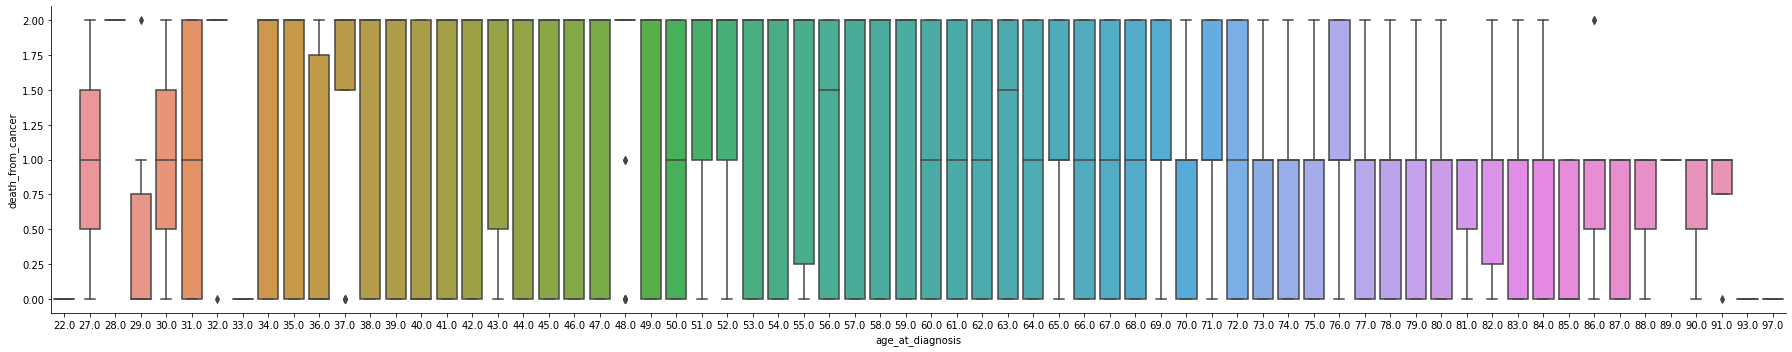

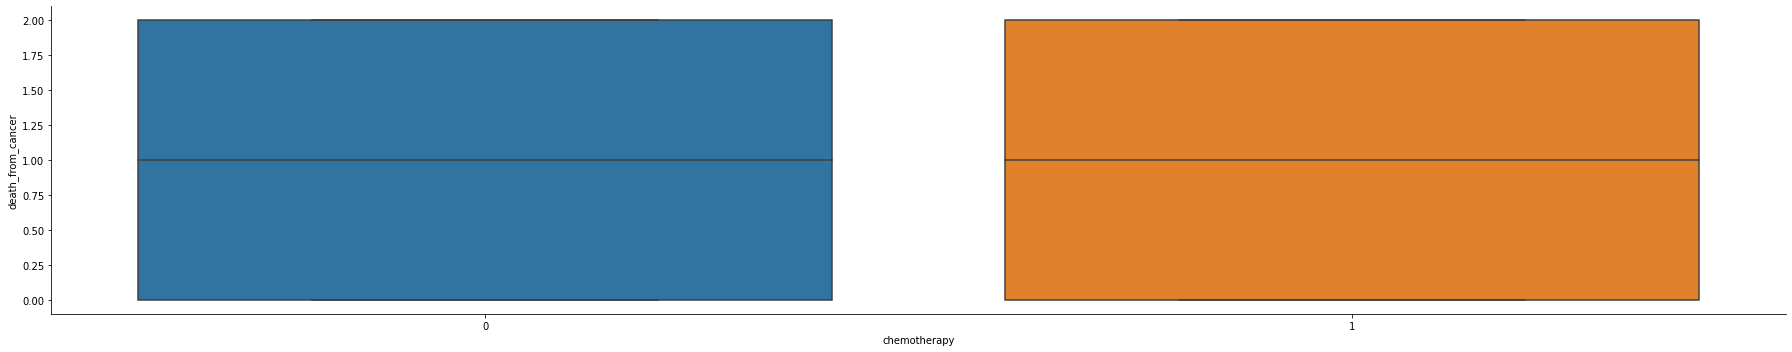

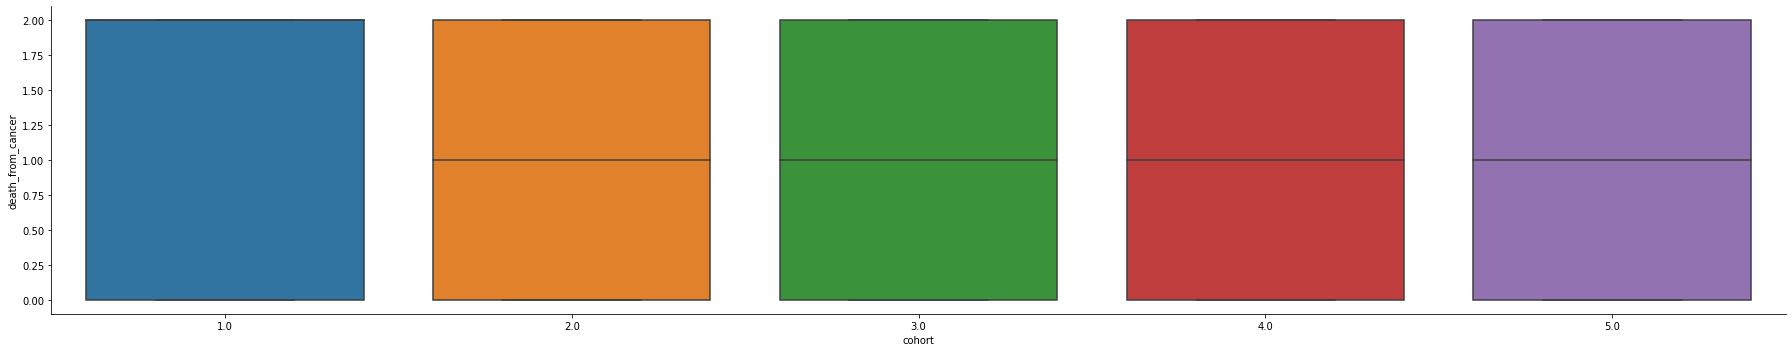

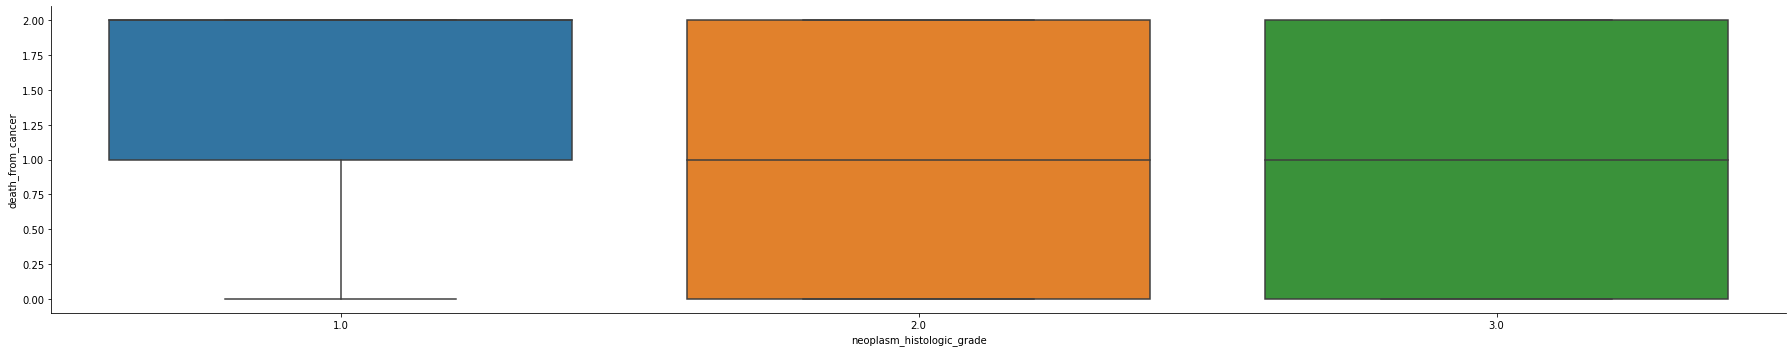

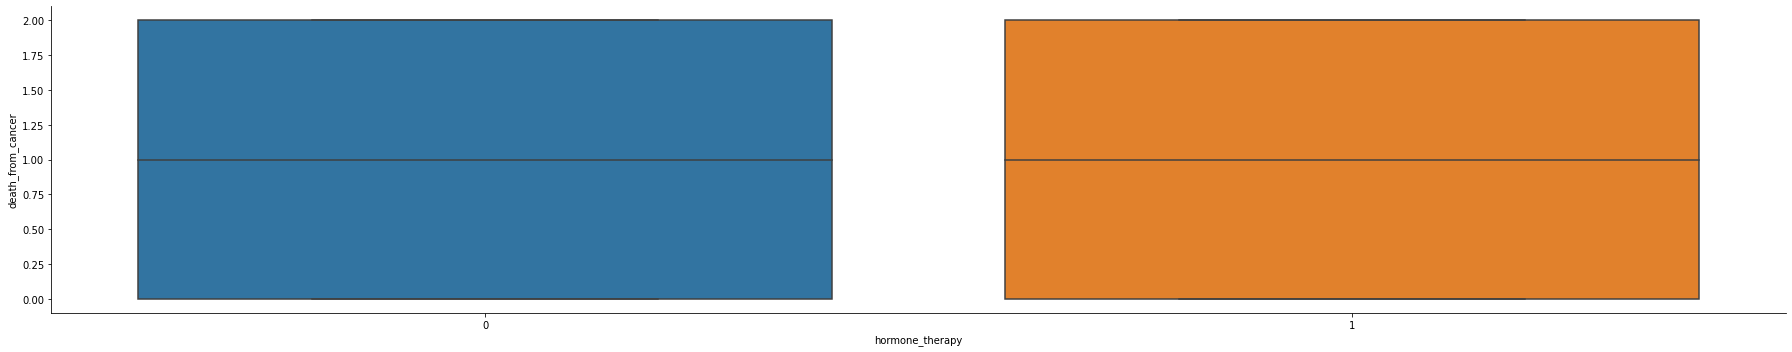

In [142]:
for i in df[df.columns[:5]]:
    sns.catplot(x=i, y='death_from_cancer', data=df, height=5, aspect=5, kind='box')
    plt.show()

### Correlation Matrix between Numerical Clinical Data

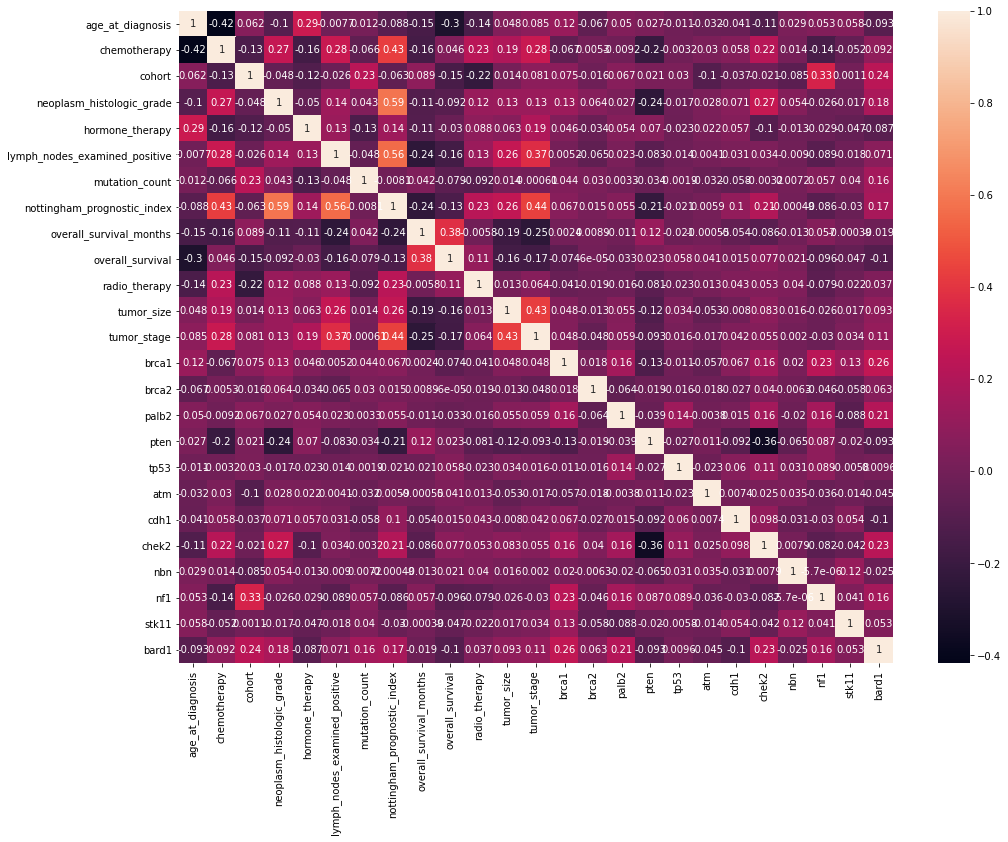

In [143]:
corr_matrix = new_clinic_data.corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True)
plt.show()

### Update Data Set

In [144]:
new_clinic_data.shape

(1904, 25)

In [145]:
new_df = df.drop(new_clinic_data.columns, axis = 1, inplace = False)
new_df = new_df.join(new_clinic_data)
new_df.isnull().sum().sum()

0

## Treatment Types and Survivals

In [146]:
treatments = ['chemotherapy', 'hormone_therapy', 'radio_therapy']

In [147]:
died = new_df[new_df['overall_survival']==0]
survived = new_df[new_df['overall_survival']==1]

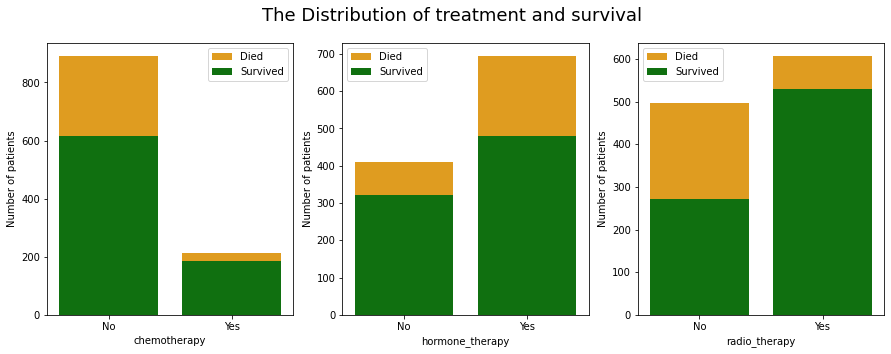

In [148]:
fig, ax = plt.subplots(ncols=3, figsize=(15,5))
fig.suptitle('The Distribution of treatment and survival', fontsize = 18)

k = 0
for i in treatments:
    sns.countplot(died[i], color='orange', label='Died', ax=ax[k])
    sns.countplot(x= survived[i] , color='green', label='Survived', ax=ax[k])
    ax[k].legend()
    ax[k].set(xticklabels=['No','Yes'])
    ax[k].set_xlabel(i)
    ax[k].set_ylabel('Number of patients')
    k += 1

plt.show()

In [149]:
new_df[treatments]

,chemotherapy,hormone_therapy,radio_therapy
0,0,1,1
1,0,1,1
2,1,1,0
3,1,1,1
4,1,1,1
...,...,...,...
1899,0,1,1
1900,0,0,1
1901,0,1,1
1902,0,1,0


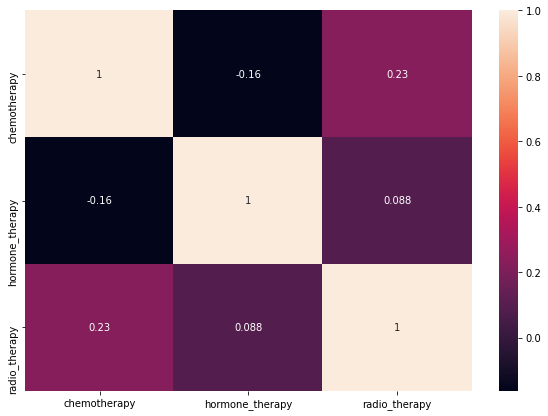

In [150]:
corr_matrix = new_df[treatments].corr()
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True)
plt.show()

/Users/ezgisubasi/opt/anaconda3/lib/python3.7/site-packages/matplotlib_venn/_venn3.py:117: UserWarning: Bad circle positioning
  warnings.warn("Bad circle positioning")


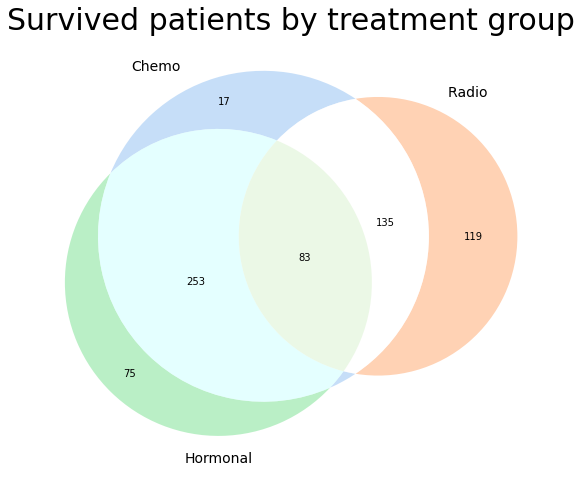

In [151]:
from matplotlib_venn import venn3

chemo = survived[(survived["chemotherapy"]==True) & (survived["radio_therapy"]==False) & (survived["hormone_therapy"]==False)]
radio = survived[(survived["chemotherapy"]==False) & (survived["radio_therapy"]==True) & (survived["hormone_therapy"]==False)]
hormonal = survived[(survived["chemotherapy"]==False) & (survived["radio_therapy"]==False) & (survived["hormone_therapy"]==True)]
chemo_radio = survived[(survived["chemotherapy"]==True) & (survived["radio_therapy"]==True) & (survived["hormone_therapy"]==False)]
radio_hormonal = survived[(survived["chemotherapy"]==False) & (survived["radio_therapy"]==True) & (survived["hormone_therapy"]==True)]
hormonal_chemo = survived[(survived["chemotherapy"]==True) & (survived["radio_therapy"]==False) & (survived["hormone_therapy"]==True)]
all_3 = survived[(survived["chemotherapy"]==True) & (survived["radio_therapy"]==True) & (survived["hormone_therapy"]==True)]

#calculate number of people for each combination and proportion death
df_subsets = [chemo, radio, hormonal, chemo_radio, radio_hormonal, hormonal_chemo, all_3]
sizes=[]
proportiondeath=[]
for dataframe in df_subsets:
    sizes.append(np.shape(dataframe)[0])
    proportiondeath.append(np.mean(dataframe["overall_survival"]))

#set size of circles relative to size of each subset (where possible)
#set gradient of blue according to proportion of death in subset calculated above
fig, ax = plt.subplots(figsize=(10,8))
v = venn3(subsets=sizes, set_labels=("Chemo", "Radio ", "Hormonal"), ax=ax, alpha=0.6, set_colors= sns.color_palette("pastel"))

for text in v.set_labels:
    text.set_fontsize(14)
    
ax.set_title("Survived patients by treatment group", size=30)
plt.show()

### Statistical Summaries

In [152]:
# Statistical summary for categorical clinical attributes 
new_df[new_df.columns].describe().T

,count,mean,std,min,25%,50%,75%,max
mlh1,1904.0,-1.050420e-06,1.000262,-6.4387,-0.568725,0.09835,0.654075,3.2935
msh2,1904.0,5.252101e-07,1.000262,-2.0740,-0.613475,-0.12845,0.413250,9.5864
msh6,1904.0,-5.252101e-08,1.000262,-4.0556,-0.675075,-0.10295,0.560850,5.4028
pms2,1904.0,-3.676471e-07,1.000264,-3.0320,-0.664625,-0.03055,0.586000,6.2231
epcam,1904.0,-1.415768e-16,1.000263,-2.1659,-0.686000,-0.14945,0.525500,6.9539
...,...,...,...,...,...,...,...,...
chek2,1904.0,-1.175530e-16,1.000262,-2.6887,-0.738550,-0.13110,0.543125,4.5382
nbn,1904.0,-3.676471e-07,1.000263,-3.6898,-0.666775,-0.01445,0.638725,5.3713
nf1,1904.0,-1.155462e-06,1.000262,-2.9686,-0.683925,-0.05480,0.668925,6.1786
stk11,1904.0,-4.726891e-07,1.000263,-3.0602,-0.683825,-0.05785,0.536275,4.8501


## Genomic Data

In [153]:
genomic_data = new_df.loc[:, new_df.dtypes == np.object]
genomic_data.head()

,pik3ca_mut,tp53_mut,muc16_mut,ahnak2_mut,kmt2c_mut,syne1_mut,gata3_mut,map3k1_mut,ahnak_mut,dnah11_mut,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,H178P,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,H1047R,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,E542K,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,S241F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [154]:
genomic_col = genomic_data.columns
for col in genomic_col:
    new_df.loc[new_df[col] != '0', col] = 1
    new_df.loc[new_df[col] == '0', col] = 0
new_df.head()

,mlh1,msh2,msh6,pms2,epcam,rad51c,rad51d,rad50,rb1,rbl1,...,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,stk11,bard1
0,-0.4844,-0.7483,-1.6660,-0.1250,-0.3721,-0.6508,-0.1278,1.7330,-0.2770,-1.0673,...,-1.6217,1.4524,0.3504,1.1517,0.0348,0.1266,-0.8361,-0.8578,-0.4294,-1.1201
1,1.2266,0.7612,0.1821,1.0104,0.5600,-0.4018,-0.2909,0.7440,-1.7488,0.4602,...,-1.2154,0.5296,-0.0136,-0.2659,1.3594,0.7961,0.5419,-2.6059,0.5120,0.4390
2,-1.7910,3.0955,0.6608,2.6127,2.5553,-0.0391,-0.4421,1.4528,1.4142,0.3143,...,0.2114,-0.3326,0.5141,-0.0803,1.1398,0.4187,-0.4030,-1.1305,0.2362,-0.1721
3,-1.3905,4.8798,0.0615,2.9414,4.1161,-0.3098,-1.3470,1.2102,1.5345,-0.6347,...,-1.6592,0.6369,1.6708,-0.8880,1.2491,-1.1889,-0.4174,-0.6165,1.0078,-0.4010
4,-0.3582,0.3032,0.8747,0.6323,0.3349,-0.2652,-0.1541,-0.7631,1.0158,1.8996,...,-0.7219,0.2168,0.3484,0.3897,0.9131,0.9356,0.7675,-0.2940,-0.2961,0.6320


In [155]:
new_df[genomic_col].astype('int64')

,pik3ca_mut,tp53_mut,muc16_mut,ahnak2_mut,kmt2c_mut,syne1_mut,gata3_mut,map3k1_mut,ahnak_mut,dnah11_mut,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1900,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1901,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1902,0,0,0,1,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0


## MinMax Scaler

In [156]:
from sklearn.preprocessing import MinMaxScaler

x = new_df.loc[:, new_df.columns != 'death_from_cancer'].values
x = MinMaxScaler().fit_transform(x) # normalizing the features
x

array([[0.61181439, 0.1136925 , 0.25264315, ..., 0.23075914, 0.33257904,
        0.29369242],
       [0.78762253, 0.24314775, 0.44803561, ..., 0.03965148, 0.45158844,
        0.53923931],
       [0.47755903, 0.44333814, 0.49864671, ..., 0.20094674, 0.4167225 ,
        0.44299551],
       ...,
       [0.76387662, 0.23789921, 0.57982323, ..., 0.29688867, 0.21000468,
        0.45110639],
       [0.76805861, 0.24630373, 0.49291635, ..., 0.11171725, 0.42702552,
        0.42688401],
       [0.71995027, 0.21721382, 0.5189144 , ..., 0.26299851, 0.45534303,
        0.40985904]])

In [157]:
normalised_df = pd.DataFrame(x)
normalised_df.head()

,0,1,2,3,4,5,6,7,8,9,...,685,686,687,688,689,690,691,692,693,694
0,0.611814,0.113692,0.252643,0.314097,0.196693,0.340103,0.227145,0.598489,0.399801,0.215459,...,0.307003,0.803884,0.418195,0.617925,0.546577,0.389558,0.314940,0.230759,0.332579,0.293692
1,0.787623,0.243148,0.448036,0.436775,0.298899,0.372600,0.214084,0.482847,0.160008,0.411453,...,0.352149,0.703436,0.364437,0.415257,0.762149,0.482198,0.467018,0.039651,0.451588,0.539239
2,0.477559,0.443338,0.498647,0.609902,0.517687,0.419937,0.201976,0.565726,0.675340,0.392732,...,0.510689,0.609585,0.442372,0.441792,0.726410,0.429977,0.362737,0.200947,0.416723,0.442996
3,0.518711,0.596360,0.435285,0.645417,0.688831,0.384607,0.129512,0.537359,0.694940,0.270966,...,0.302836,0.715116,0.613203,0.326318,0.744198,0.207530,0.361148,0.257139,0.514266,0.406945
4,0.624782,0.203870,0.521262,0.395922,0.274217,0.390428,0.225039,0.306623,0.610430,0.596143,...,0.406985,0.669388,0.417900,0.508985,0.689516,0.501501,0.491916,0.292395,0.349430,0.569635


In [158]:
normalised_df = pd.DataFrame(x)
normalised_df.head()

,0,1,2,3,4,5,6,7,8,9,...,685,686,687,688,689,690,691,692,693,694
0,0.611814,0.113692,0.252643,0.314097,0.196693,0.340103,0.227145,0.598489,0.399801,0.215459,...,0.307003,0.803884,0.418195,0.617925,0.546577,0.389558,0.314940,0.230759,0.332579,0.293692
1,0.787623,0.243148,0.448036,0.436775,0.298899,0.372600,0.214084,0.482847,0.160008,0.411453,...,0.352149,0.703436,0.364437,0.415257,0.762149,0.482198,0.467018,0.039651,0.451588,0.539239
2,0.477559,0.443338,0.498647,0.609902,0.517687,0.419937,0.201976,0.565726,0.675340,0.392732,...,0.510689,0.609585,0.442372,0.441792,0.726410,0.429977,0.362737,0.200947,0.416723,0.442996
3,0.518711,0.596360,0.435285,0.645417,0.688831,0.384607,0.129512,0.537359,0.694940,0.270966,...,0.302836,0.715116,0.613203,0.326318,0.744198,0.207530,0.361148,0.257139,0.514266,0.406945
4,0.624782,0.203870,0.521262,0.395922,0.274217,0.390428,0.225039,0.306623,0.610430,0.596143,...,0.406985,0.669388,0.417900,0.508985,0.689516,0.501501,0.491916,0.292395,0.349430,0.569635


In [159]:
normalised_df.shape

(1904, 695)

## Choose Best PCA 

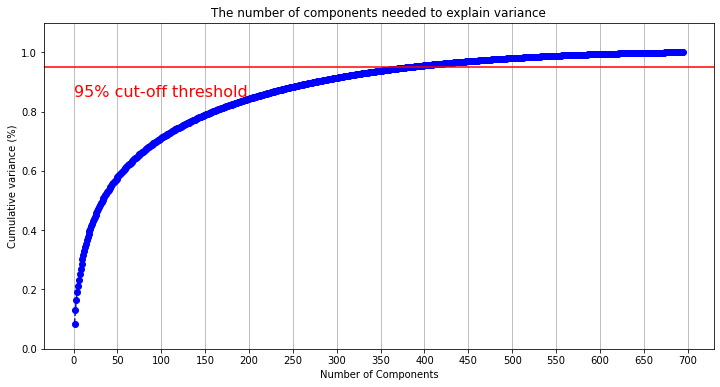

In [160]:
from sklearn.decomposition import PCA

data_rescaled = normalised_df

pca = PCA().fit(data_rescaled)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 696, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 750, step=50)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

## PCA Implementation

In [161]:
from sklearn.decomposition import PCA
pca = PCA(n_components=375)
principal_components = pca.fit_transform(data_rescaled)
principal_df = pd.DataFrame(data = principal_components)
principal_df.head()

,0,1,2,3,4,5,6,7,8,9,...,365,366,367,368,369,370,371,372,373,374
0,-0.071844,-1.823690,-0.571922,0.435184,0.111845,-1.177432,-0.105235,0.927950,0.171567,0.907865,...,0.031862,-0.051900,-0.007403,-0.074317,-0.028378,0.016686,-0.016517,-0.028183,0.039623,0.043236
1,-0.409669,-0.438614,1.094638,0.861473,-0.427827,0.515830,0.004465,0.273812,0.035781,0.499546,...,-0.105799,-0.031119,-0.093212,-0.004636,-0.010937,0.071847,-0.000170,0.024866,0.015016,0.012380
2,-0.328145,-1.755208,0.734341,-1.153959,-0.079975,1.452518,0.973652,0.496443,-0.716789,0.542663,...,-0.036197,-0.026508,0.018083,-0.108124,-0.077115,-0.013472,0.112675,0.059784,-0.063358,-0.068151
3,-0.440305,-1.767886,0.632885,-0.214213,0.008181,0.939153,2.037070,-0.030058,0.334784,0.639183,...,0.139614,-0.104959,0.129474,0.069360,0.062428,0.067764,-0.001711,0.111850,0.019630,-0.066324
4,0.042537,-0.280770,1.329315,-0.311082,0.351498,-0.722132,0.634541,-1.198320,-0.125452,0.862902,...,0.173416,0.075853,0.055276,-0.126284,0.012535,0.097186,0.125475,-0.068349,0.002303,-0.001964


## Model

In [162]:
from sklearn.model_selection import train_test_split
X = principal_df
y = new_df['death_from_cancer']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [188]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix

def hyper_tuning(name, model, model_params, X_train, y_train, X_test, y_test, cv):  
    grid_cv = GridSearchCV(model, model_params, n_jobs=-1, cv=cv)
    grid_cv_model = grid_cv.fit(X_train, y_train)
    print()
    print(name)
    print('Best Parameters: ', grid_cv_model.best_params_)
    print('Best Model Score = {}'.format(grid_cv_model.best_score_))
    #print('Train score:   ', grid_cv_model.score(X_train, y_train))
    #print('Test score:    ', grid_cv_model.score(X_test, y_test))
    print()
    return grid_cv_model
    
def model_metrics(model, X_train, y_train, X_test, y_test):   
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    results = cross_val_score(model, X_train, y_train, cv = kfold)
    print("CV scores: ", results); print("CV Standard Deviation: ", results.std()); 
    print();
    print('CV Mean score: ', results.mean()); 
    model.fit(X_train, y_train)
    print('Train score:   ', model.score(X_train, y_train))
    print('Test score:    ', model.score(X_test, y_test))
    
    pred = model.predict(X_test)
    print()
    print('Confusion Matrix: ')
    print(confusion_matrix(y_test, pred))
    print()
    print('Classification Report:  ')
    print(classification_report(y_test, pred))
    train_score =  model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    test_pred = model.predict(X_test)
    print()
    return results.mean(), results.std()

In [193]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier

BOLD = '\033[1m'
END = '\033[0m'

results = []
names = []

### KNN ###

knn_params = {
    "n_neighbors" : [5,15,25,30,35,40,100],
    "weights" : ["uniform" , "distance"]
    }

knn_name = BOLD + 'K Neighbors Classifier Model:' + END
knn_model = KNeighborsClassifier()
final_model = hyper_tuning(knn_name, knn_model, knn_params, X_train, y_train, X_test, y_test,4)
result_mean, result_std = model_metrics(final_model, X_train, y_train, X_test, y_test)
names.append(knn_name)
results.append([result_std, result_mean, result_std])

### Logistic Regression ###

lr_params = {
    "penalty": ["l1", "l2"],
    "C": np.logspace(-2,4,100)
    }

lr_name = BOLD + 'Logistic Regression Model:' + END
lr_model = LogisticRegression(random_state=42)
final_model = hyper_tuning(lr_name, lr_model, lr_params, X_train, y_train, X_test, y_test,4)
result_mean, result_std = model_metrics(final_model, X_train, y_train, X_test, y_test)
names.append(lr_name)
results.append([result_std, result_mean, result_std])

### Random Forest Classifier ###

rf_params = {
    #'n_estimators': [10, 50, 100, 150, 200, 250],
    'max_features':[2, 3, 5, 7, 8],
    #'max_depth': [1, 2, 3, 4, 5, 8],
    }

rf_name = BOLD + 'Random Forest Classifier Model:' + END
rf_model = RandomForestClassifier(n_estimators=100)
final_model = hyper_tuning(rf_name, rf_model, rf_params, X_train, y_train, X_test, y_test,5)
result_mean, result_std = model_metrics(final_model, X_train, y_train, X_test, y_test)
names.append(rf_name)
results.append([result_std, result_mean, result_std])

### Decision Tree Classifier ###

dt_params = {
    'max_depth': [1, 2, 3, 4, 5, 8],
    }

dt_name = BOLD + 'Decision Tree Classifier Model:' + END
dt_model = DecisionTreeClassifier(random_state=42)
final_model = hyper_tuning(dt_name, dt_model, dt_params, X_train, y_train, X_test, y_test,4)
result_mean, result_std = model_metrics(final_model, X_train, y_train, X_test, y_test)
names.append(dt_name)
results.append([result_std, result_mean, result_std])

### Extra Tree Classifier ###

et_params = {
    'n_estimators': [10, 50, 100],
    'max_depth': [1, 2, 3, 4, 5, 8],
    }

et_name = BOLD + 'Extra Trees Classifier Model:' + END
et_model = ExtraTreesClassifier(random_state=42)
final_model = hyper_tuning(et_name, et_model, et_params, X_train, y_train, X_test, y_test,5)
result_mean, result_std = model_metrics(final_model, X_train, y_train, X_test, y_test)
names.append(et_name)
results.append([result_std, result_mean, result_std])


### AdaBoost Classifier ###

ada_params = {
    'n_estimators': [10, 50, 100],
    #'max_depth': [1, 2, 3, 4, 5, 8],
    'learning_rate' : [0.25, 0.50]
    }

ada_name = BOLD + 'AdaBoost Classifier Model:' + END
ada_model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=8),random_state=42)
final_model = hyper_tuning(ada_name, ada_model, ada_params, X_train, y_train, X_test, y_test,4)
result_mean, result_std = model_metrics(final_model, X_train, y_train, X_test, y_test)
names.append(ada_name)
results.append([result_std, result_mean, result_std])


K Neighbors Classifier Model:
Best Parameters:  {'n_neighbors': 35, 'weights': 'uniform'}
Best Model Score = 0.732789404613897

CV scores:  [0.7442623  0.71147541 0.70819672 0.72368421 0.73026316]
CV Standard Deviation:  0.013081277377198492

CV Mean score:  0.7235763589301122
Train score:    0.7518056467498359
Test score:     0.7349081364829396

Confusion Matrix: 
[[ 65  31  12]
 [ 46  43  11]
 [  1   0 172]]

Classification Report:  
              precision    recall  f1-score   support

           0       0.58      0.60      0.59       108
           1       0.58      0.43      0.49       100
           2       0.88      0.99      0.93       173

    accuracy                           0.73       381
   macro avg       0.68      0.68      0.67       381
weighted avg       0.72      0.73      0.72       381



Logistic Regression Model:
Best Parameters:  {'C': 0.046415888336127795, 'penalty': 'l2'}
Best Model Score = 0.8168048072938251

CV scores:  [0.77377049 0.84262295 0.80655738 0

## Final Scores

In [242]:
names = ['KNN', 'Logistic', 'Random Forest', 'Decision Tree', 'Extra Trees', 'AdaBoost']

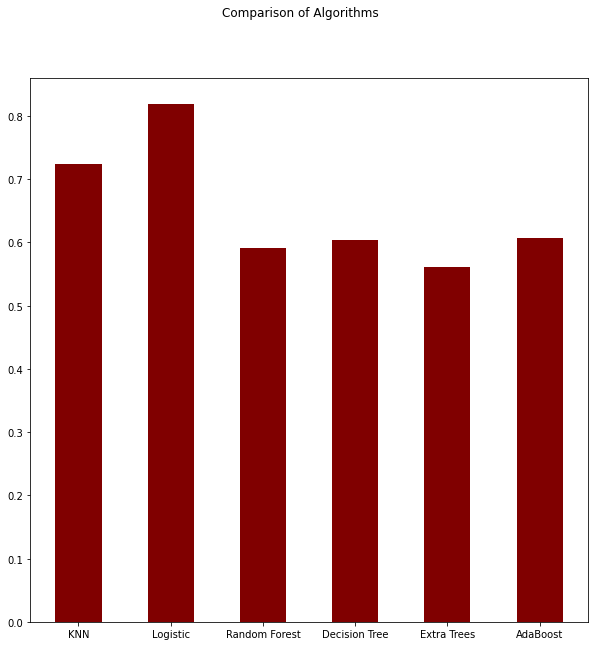

In [243]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison of Algorithms')
new_results = []
for i in range(len(results)):
    new_results.append(results[i][1])
plt.bar(names, new_results, color ='maroon',
        width = 0.5)
plt.show()